In [29]:
%matplotlib inline

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import nltk package
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

# scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score

import seaborn as sns

In [2]:
# Download the NLTK English tokenizer and the stopwords of all languages
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/cbvincen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cbvincen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
directory = os.getcwd()

In [4]:
tweet_dir = os.path.join(directory,'tweets')

In [5]:
tweets = pd.read_csv(tweet_dir, encoding='latin-1')
tweets.columns = ['Polarity', 'ID', 'Date', 'Flag', 'User', 'Text']

In [6]:
tweets.drop(['Flag', 'ID'], axis=1, inplace=True)
tweets.head()

,Polarity,Date,User,Text
0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [7]:
tweets1 = tweets[0:5000] 
tweets2 = tweets[905000:910000]

# tweets = tweets1.add(tweets2, fill_value=0)

tweets = [tweets1, tweets2]
  
tweets = pd.concat(tweets)

tweets.head()
#tweets.shape

,Polarity,Date,User,Text
0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [8]:
# re encode positive tweets to 1 instead of 4
def encode(label):
    if label == 0:
        return 0
    elif label == 4:
        return 1

In [9]:
tweets['Polarity'] = tweets.apply(lambda x: encode(x['Polarity']), axis=1)

In [10]:
tweets.head()

,Polarity,Date,User,Text
0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [11]:
vectorizer = CountVectorizer(analyzer='word', max_features=2000, 
                             tokenizer=word_tokenize, stop_words= stopwords.words('english'))

In [12]:
df_Y = np.array(tweets['Polarity'])
df_Y.shape

(10000,)

In [13]:
df_X = vectorizer.fit_transform(tweets["Text"]).toarray()

In [14]:
df_train_X, df_test_X, df_train_Y, df_test_Y = train_test_split(df_X, df_Y, test_size= .2, random_state= 200)

In [15]:
def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X, y)
    return clf

In [16]:
df_clf = train_SVM(df_train_X, df_train_Y)

In [17]:
df_predicted_train_Y = df_clf.predict(df_train_X)
df_predicted_test_Y = df_clf.predict(df_test_X)

In [18]:
print(classification_report(df_train_Y,df_predicted_train_Y))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3997
           1       0.83      0.88      0.85      4003

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000



# TF-IDF

In [19]:
tfidf = TfidfVectorizer(sublinear_tf=True, analyzer='word', max_features=2000,tokenizer=word_tokenize)

In [20]:
df_tfidf_X = tfidf.fit_transform(tweets['Text']).toarray()

In [21]:
df_train_tfidf_X, df_test_tfidf_X, df_train_tfidf_Y, df_test_tfidf_Y = train_test_split(df_tfidf_X, df_Y, test_size= .2, random_state= 200)

In [22]:
df_tfidf_clf = train_SVM (df_train_tfidf_X, df_train_tfidf_Y)

In [23]:
df_pred_train_tfidf_Y = df_tfidf_clf.predict(df_train_tfidf_X)
df_pred_test_tfidf_Y = df_tfidf_clf.predict(df_test_tfidf_X)

In [24]:
print(classification_report(df_train_tfidf_Y, df_pred_train_tfidf_Y))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3997
           1       0.84      0.85      0.84      4003

    accuracy                           0.84      8000
   macro avg       0.84      0.84      0.84      8000
weighted avg       0.84      0.84      0.84      8000



In [25]:
# Draw the heatmap of training errors.
def draw_heatmap(training_errors):
    # training_errors: A NumPy array with the shape (len(C_list), len(gamma_list))
    # gamma_list: List of gamma(s).
    # C_list: List of C(s).
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title('Training error w.r.t $C$ and $\gamma$')
    plt.show()

In [28]:
classifier = svm.SVC(kernel='rbf')
search_results =  GridSearchCV(classifier, {'C':C_list, 'gamma': gamma_list, 'kernel': ['rbf']}) #########

search_results.fit(df_train_X,df_train_Y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1e-06, 1e-05, 0.0001, 0.001, 0.01],
                         'kernel': ['rbf']})

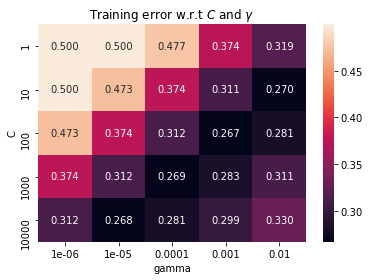

In [30]:
# here's how we can extract all the same information from the search_results data structure

# first get the parameters used in the order they were used
results = pd.DataFrame( search_results.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results['score'] = 1 - search_results.cv_results_['mean_test_score']

# turn a long table into a 2-D table with C being the 1st axis (y-axis) and gamma as the 2nd (x-axis)
results = results.pivot('C','gamma','score')

# and plot it
# using the dataframe means we don't need the wrapper fct around sns.heatmap we used before
sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [33]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(df_train_X,df_train_Y)
opt_test_score = 1 - opt_classifier.score(df_test_X,df_test_Y) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 


Test set error for optimum classifier(C=100,gamma=0.001): 0.277
